<a href="https://colab.research.google.com/github/codernayeem/dl-practice/blob/main/fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
pd.Series(y_train).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
def plot_img(index, col=5, single_plot_size=(2, 2)):
    n = len(index)
    if n < col:
        col = n
    row = n // col + 1
    plt.figure(figsize=(single_plot_size[0]*col, single_plot_size[1]*row))
    plt.gray()
    for i, ii in enumerate(index):
        plt.subplot(row, col, i+1)
        plt.imshow(X_train[ii], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(class_names[y_train[ii]])
    plt.show()

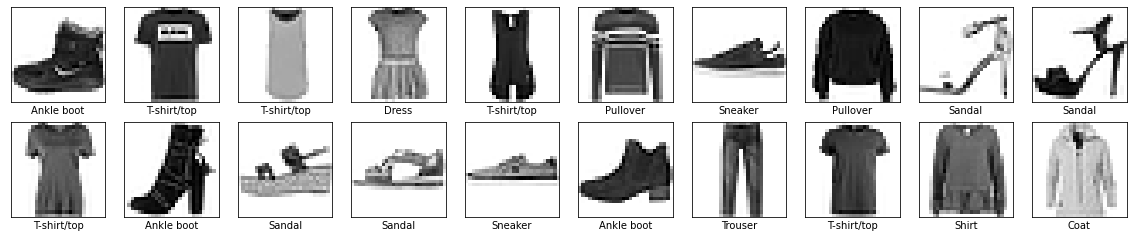

In [7]:
plot_img(range(20), col=10)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
X_train, X_test = X_train / 255, X_test / 255

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5044 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3836 - accuracy: 0.8621
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3408 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.8835
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3271 - accuracy: 0.8875


[0.3270982503890991, 0.887499988079071]

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [14]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[5.7762861e-04, 1.9017233e-07, 7.7032109e-06, 3.6936658e-08,
        3.8743428e-07, 6.2497020e-02, 1.6253542e-05, 6.2330210e-01,
        2.3901463e-04, 9.9896437e-01],
       [7.4649501e-01, 5.0519416e-10, 9.9998736e-01, 6.2341019e-07,
        9.5857745e-01, 1.0328506e-10, 8.8276827e-01, 6.2244647e-11,
        2.5204833e-06, 1.4400696e-10],
       [1.2176207e-01, 1.0000000e+00, 2.3818016e-04, 4.5960605e-02,
        1.9752979e-04, 6.0257709e-11, 9.6587901e-05, 7.3860440e-14,
        1.3676637e-07, 6.4664047e-09],
       [1.1604607e-02, 9.9999928e-01, 5.8997128e-05, 3.2665324e-01,
        2.3607314e-03, 9.1906847e-09, 1.1432469e-03, 3.5872548e-12,
        1.0180502e-07, 2.8036915e-08],
       [9.8660856e-01, 1.7685607e-05, 8.8889301e-01, 8.6600989e-02,
        1.7770231e-01, 1.2124696e-06, 9.9373031e-01, 2.4156625e-07,
        2.7961135e-03, 5.8881869e-06]], dtype=float32)

In [15]:
y_pred_actual = np.array([], dtype=int)
for i in y_pred:
    y_pred_actual = np.append(y_pred_actual, np.argmax(i))
y_pred_actual[:5]

array([9, 2, 1, 1, 6])

In [16]:
print(classification_report(y_test, y_pred_actual))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.87      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.80      0.80      1000
           5       0.97      0.96      0.97      1000
           6       0.75      0.65      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [17]:
def print_confusion_matrix(confusion_matrix, class_names, figsize=(10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

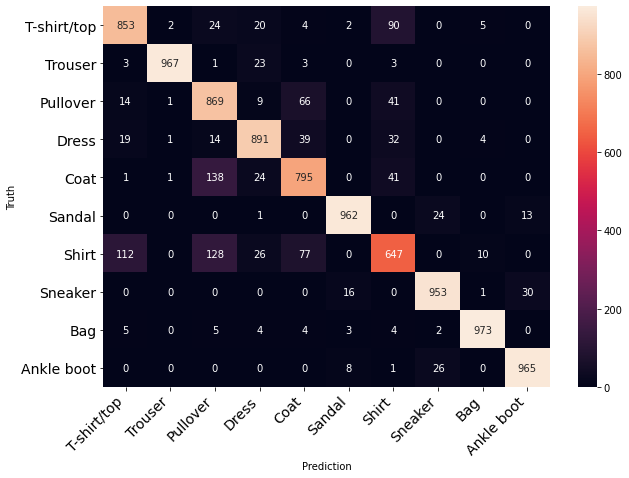

In [18]:
cm = confusion_matrix(y_test, y_pred_actual)
print_confusion_matrix(cm, class_names)

In [19]:
do_not_match_index = []
for i in range(len(y_test)):
   if y_test[i] != y_pred_actual[i]:
      do_not_match_index.append(i)
do_not_match_index[:5]

[12, 17, 23, 25, 29]

In [20]:
def plot_test_img(index, col=5, single_plot_size=(2, 2)):
    n = len(index)
    if n < col:
        col = n
    row = n // col + 1
    plt.figure(figsize=(single_plot_size[0]*col, single_plot_size[1]*row))
    plt.gray()
    for c, i in enumerate(index):
        plt.subplot(row, col, c+1)
        plt.imshow(X_test[i], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(f'Truth: {class_names[y_test[i]]}')
        plt.xlabel("{} {:2.0f}%".format(class_names[y_pred_actual[i]], 100*np.max(y_pred[i])))
    plt.show()

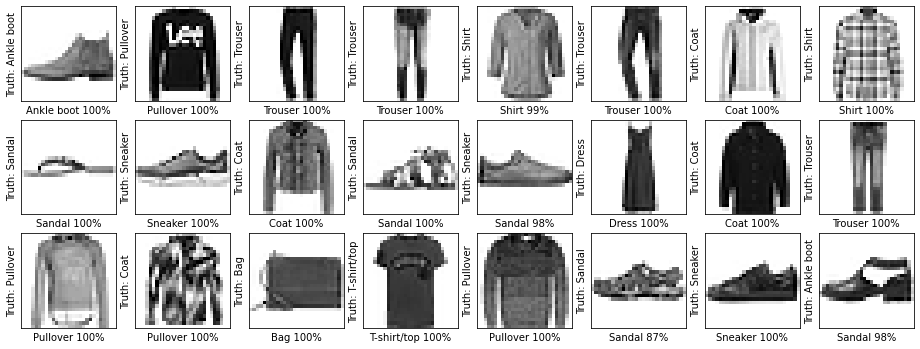

In [21]:
plot_test_img(range(24), col=8)

In [22]:
len(do_not_match_index)

1125

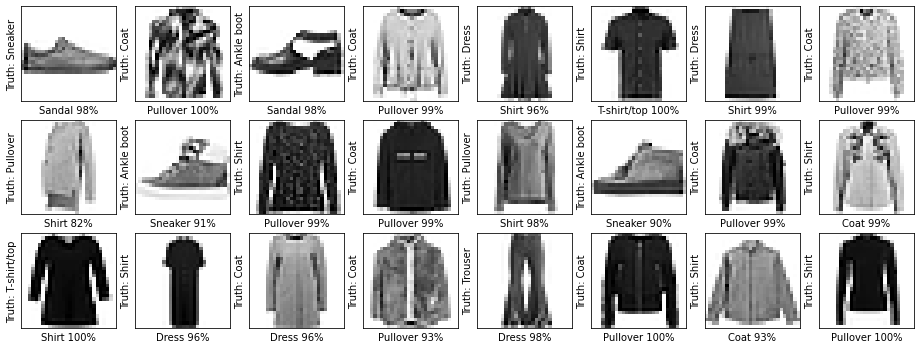

In [23]:
plot_test_img(do_not_match_index[:24], col=8)